<h3>Regularised regression</h3>
<p>Our original squared loss function in matrix/vector notation is:
$$ L = \frac{1}{N}\sum_{n=1}^N (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$
Here's another loss function:
$$ L = \lambda \mathbf{w}^T\mathbf{w} + \frac{1}{N}\sum_{n=1}^N (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$
Recall that we're minimising this function and so (if $\lambda>0$) this additional term will penalise large positive and negative values in $\mathbf{w}$. $\lambda$ controls how much influence this new term has over the original squared error term.</p>

<p>Differentiating this with respect to $\mathbf{w}$ and then setting to zero (this is a good exercise to do) results in:
$$ (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})\mathbf{w} = \mathbf{X}^T\mathbf{t} $$
where $\mathbf{I}$ is a square matrix with ones on the diagonal and zeros elsewhere (the identity matrix).</p>

<p>To demonstrate the effect of this additional term, we will generate some synthetic data by using a quadratic function and assing some random (normal / Gaussian) noise.</p>

(1119,)
(1119, 12)
lampda 0 Mean Square Error = 0.392695718973
lampda 0.01 Mean Square Error = 0.392983406103
lampda 0.05 Mean Square Error = 0.392663219534
lampda 0.1 Mean Square Error = 0.392324860198
lampda 0.5 Mean Square Error = 0.391308390564
lampda 1 Mean Square Error = 0.39163822525
lampda 3 Mean Square Error = 0.394446453058
lampda 5 Mean Square Error = 0.396664444384
lampda 10 Mean Square Error = 0.400948223702
lampda 20 Mean Square Error = 0.407678580669
lampda 25 Mean Square Error = 0.410503124736


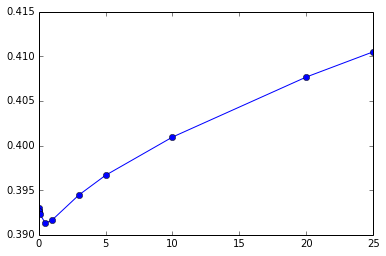

In [52]:
import urllib
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 'winequality-red.csv')
import numpy as np
with open('winequality-red.csv') as f:
    lines = (line for line in f)
    data = np.loadtxt(lines, delimiter=';', skiprows=1)
%matplotlib inline
import pylab as plt
    
N = data.shape[0] #get tupple (numRows, numCols)
np.random.shuffle(data)

train = data[:int(N*0.7)]
test = data[int(N*0.7):]
X_train = train[:,:11]
X_train = np.c_[np.ones(train.shape[0]), X_train] # append 1s as first column
q_train = train[:,11]
print q_train.shape
print X_train.shape

X_test = test[:,:11]
X_test = np.c_[np.ones(test.shape[0]), X_test]
q_test = test[:,11]

lambs = [0,0.01,0.05,0.1,0.5,1,3,5,10,20,25]
errors = []
for lamb in lambs:
    w = np.linalg.solve(np.dot(X_train.T,X_train) + lamb*np.identity(12),np.dot(X_train.T,q_train))
    f_test = np.dot(X_test,w)
    meanSquareError = ((q_test-f_test)**2).mean()
    errors += [meanSquareError]
    print "lampda", lamb, "Mean Square Error =", meanSquareError
    #plt.figure()
    #plt.scatter(f_test,q_test, color='blue')
    
plt.plot(lambs, errors, '-o')
plt.show()


<p>As $\lambda$ increases, high values in $\mathbf{w}$ are more heavily penalised which leads to *simpler* functions. Why do lower values correspond to simpler functions?</p>
<p>Firstly, what does *simpler* mean?</p>
<p>I would argue that simpler functions have smaller derivatives (first, second, etc) as they typically change more slowly. In our polynomials, the derivatives are dependent on the values of $\mathbf{w}$. In particular our polynomial is:
$$ t = \sum_{d=0}^D w_d x^d $$
and the first derivative is:
$$ \frac{dt}{dx} = \sum_{d=1}^D dw_d x^{d-1} $$
and second is:
$$ \frac{d^2t}{dx^2} = \sum_{d=2}^D d(d-1)w_d x^{d-2} $$
which in both cases increases with increasing values of $w_d$. So penalising high (positive and negative) values decreases (in general) the gradients (and gradients of gradients, etc).</p> 

[[ 111.  111.  111.  111.  111.  111.  111.  111.  111.  111.]]
[    0.   120.   240.   360.   480.   600.   720.   840.   960.  1080.
  1200.]
[ 0.42823542  0.42832227  0.42836118  0.42845849  0.43017348  0.43260665
  0.43882945  0.44229478  0.44784231  0.45535056  0.45832322]
[ 0.43428839  0.43339803  0.43330801  0.43328153  0.43432095  0.43625508
  0.44144661  0.44433149  0.44901716  0.45565963  0.45836897]
[ 0.39360342  0.39381463  0.39344237  0.39305893  0.39200143  0.39243085
  0.39541737  0.39772556  0.40225713  0.40940223  0.41236628]


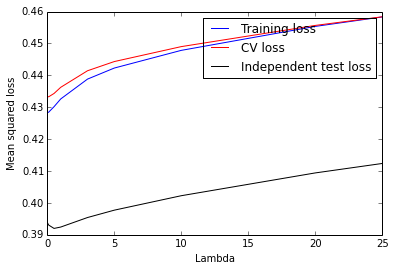

In [54]:
N = train.shape[0]
K = 10
sizes = np.tile(np.floor(N/10),(1,K))
print sizes
sizes[-1] = sizes[-1] + N - sizes.sum()
c_sizes = np.hstack((0,np.cumsum(sizes)))
print c_sizes
X = np.copy(train[:,:11])
X = np.c_[np.ones(train.shape[0]), X]
t = np.copy(train[:,11])
X_test = np.copy(test[:,:11])
X_test = np.c_[np.ones(test.shape[0]), X_test]
t_test = np.copy(test[:,11])
lambs = [0,0.01,0.05,0.1,0.5,1,3,5,10,20,25]
cv_loss = np.zeros((K, len(lambs)))
ind_loss = np.zeros((K, len(lambs)))
train_loss = np.zeros((K, len(lambs)))

k = 0
for lamb in lambs:
    for fold in range(K):
        X_fold = X[c_sizes[fold]:c_sizes[fold+1],:]
        X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)

        t_fold = t[c_sizes[fold]:c_sizes[fold+1]]
        t_train = np.delete(t,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)

        w = np.linalg.solve(np.dot(X_train.T,X_train) + lamb*np.identity(12),np.dot(X_train.T,t_train))
        fold_pred = np.dot(X_fold,w)
        cv_loss[fold,k] = ((fold_pred - t_fold)**2).mean()
        ind_pred = np.dot(X_test,w)
        ind_loss[fold,k] = ((ind_pred - t_test)**2).mean()
        train_pred = np.dot(X_train,w)
        train_loss[fold,k] = ((train_pred - t_train)**2).mean()
    k += 1

print train_loss.mean(axis=0)
print cv_loss.mean(axis=0)
print ind_loss.mean(axis=0)
plt.plot(lambs,train_loss.mean(axis=0),'b-',label="Training loss")
plt.plot(lambs,cv_loss.mean(axis=0),'r-',label="CV loss")
plt.plot(lambs,ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Mean squared loss')